# E_1.08 Physics: Exercise 2 - Capacitor Charchinng/Discharging

- University: Rhein-Waal University of Applied Sciences (Hochschule Rhein-Waal)
- Course:  E_1.08 Physics: Mechanics, Electricity and Magentism, WS2022/23

## Overview
---

The following lab exercise aims to profile the characteristic curve of a capacitor in discharging/charging states.

## Extra software

Please Download [Arduino Legacy IDE](https://www.arduino.cc/en/software#legacy-ide-18x)

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Arduino_Logo.svg/1024px-Arduino_Logo.svg.png" width="400px\"/>
    <br>
    <i></i>
</center>

## Background preparation before starting the lab
---

The following steps should have been done before startung the exercise:

- [Install Anaconda](https://docs.anaconda.com/anaconda/install/index.html)
- [Create the EEng Conda Environment](../EEng_LAB_Course_Preparation/eeng_conda_env.md)
- [Download Notebooks from Git Repo](https://github.com/rolfbecker/EE_1.08_2_EEng_LAB_WS2022)

## Safety Considerations
---

- **DO NOT** energize **ANY** circuit without prior review by the lab assistants, thay will make sure that the circuit is correctly connected, and if not, the will point out the necessary corrections.
- **DO NOT** drop or hit **ANY** components, especially measuring instruments such as the multimeter, Luxmeter, etc.

## List of Equipment
---

**Make sure you have all the components and instruments listed below before you start**.

Components:
- x1 100uF Capacitor
- x1 10K Ohm Resistor
- x1 Arduino UNO with cable
- Set of jumper cables

Instruments:
- x1 Multimeter

## Circuit
---

The diagrams below show the test circuit you must make for this exercise.

<div style="display: flex;">
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
        <img src="./images/Capacitor_schem.png" width="400px"/>
        <br>
        <i></i>
      </center>
  </div>
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
    <img src="./images/Capacitor_bb.png" width="600px"/>
    <br>
    <i></i>
      </center>
  </div>
</div>

## Flashing Arduino UNO

Open the file [Cap_Charging_Discharging_V003](./ex2/Arduino/Cap_Charging_Discharging_V003.ino) in the folder `Arduino`



## Data Capture
---

The data capture is done using Cap_Charging_Discharging_V003 `Arduino` code. 
- After installing and running the code on the board, open up the **Serial Monitor**. 
- Let the Arduino circuit run for at least **2 cycle** of charging and discharging.
- The data must be copied in a text file with extension `.txt.` inside the `data` folder, please follow the format of the `test.txt` file inside the `data` folder.

An example of how the file should be formatted:
<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">chargeMV,capacitorMV,digitalMV
5010,141,0
5010,288,0
5010,429,0
</code>

The first column of data corresponds to the **Voltage Output** $mV_{out}$ measured in **millivolt**<br>The second column is the **Voltage across Capacitor** $mV_{C}$ measured in **millivolt**<br>The third colum is the **Voltage Input** $mV_{in}$ measured in **millivolt**,

**Use the following file:** [myOwnData.txt](./data/myOwnData.txt)

## Data Display

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

**Fill requested information**:

In [2]:
############################
# Fill these variables with
# the requested information
############################

FILE_NAME = "data.txt"  # your file name WITH extension

V0 = 5.0 # Output voltage produced by the Arduino UNO

In [35]:
############################
# You do NOT need to change 
# anything in the section below
############################

FILE_PATH = f"./data/{FILE_NAME}"

df = pd.read_csv(FILE_PATH)
time = np.arange(0, len(df.chargeMV)*20, 20)
df.set_index(time, inplace = True)
df.head()

,chargeMV,capacitorMV,digitalMV
0,5010,141,0
20,5010,288,0
40,5010,429,0
60,5010,566,0
80,5010,703,0


[]

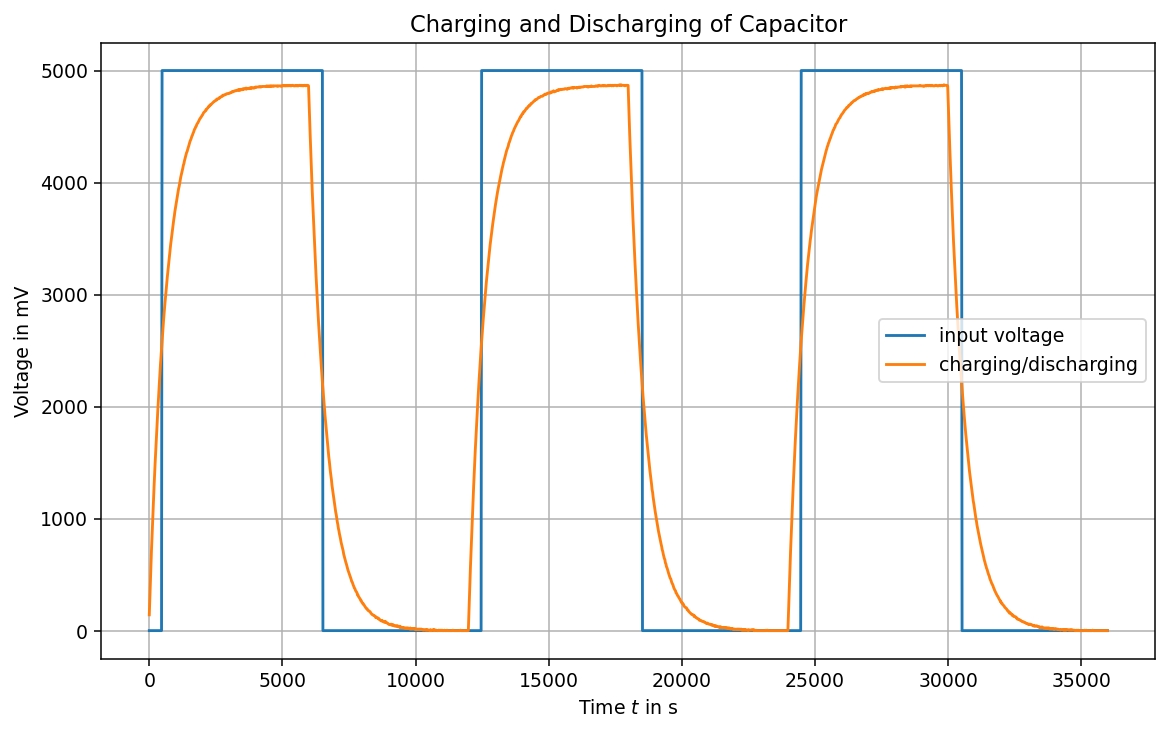

In [43]:
V_C = df.capacitorMV
V_in = df.digitalMV
t = df.index

fig1, ax1 = plt.subplots(figsize=(10,6), dpi=136)
ax1.plot(t,V_in, label="input voltage")
ax1.plot(t,V_C, label="charging/discharging")
ax1.set_xlabel("Time $t$ in s")
ax1.set_ylabel("Voltage in mV")
ax1.set_title("Charging and Discharging of Capacitor")
# ax1.set_xlim(0,5)
# ax1.set_ylim(0,5)
ax1.grid(True)
ax1.legend()
plt.plot()